Notebook containing initial analyses and data handling pipelines. We will grade the correctness, quality of code, and quality of textual descriptions.


# Plots and Actors in Blockbusters: What Do People Favor?


# 0.0 Load the dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/EPFL_course_project/ada-2022-project-superplainteamname2022/
!pip install -q seaborn==0.12.0

/content/drive/MyDrive/EPFL_course_project/ada-2022-project-superplainteamname2022
     |████████████████████████████████| 285 kB 5.2 MB/s 


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# `movie.metadata.tsv` [3.4 M]

# Metadata for 81,741 movies, extracted from the Noverber 4, 2012 dump of Freebase.  Tab-separated; columns:

# 1. Wikipedia movie ID
# 2. Freebase movie ID
# 3. Movie name
# 4. Movie release date
# 5. Movie box office revenue
# 6. Movie runtime
# 7. Movie languages (Freebase ID:name tuples)
# 8. Movie countries (Freebase ID:name tuples)
# 9. Movie genres (Freebase ID:name tuples)

movie_metadata = pd.read_csv(
    "./data/MovieSummaries/movie.metadata.tsv",
    sep="\t",
    header=None,
    names=[
        "movie_id",
        "freebase_movie_id",
        "movie_name",
        "movie_release_date",
        "movie_box_office_revenue",
        "movie_runtime",
        "movie_languages",
        "movie_countries",
        "movie_genres",
    ],
    parse_dates=["movie_release_date"],
    date_parser=lambda x: pd.to_datetime(x, errors="coerce"),
)
# drop the row that does not have revenue data

movie_metadata.head()
# movie id is wikipedia page id
# https://en.wikipedia.org/?curid={movie_id}

# How to use query freebase id?
# https://edstem.org/eu/courses/134/discussion/3845

# https://query.wikidata.org/#PREFIX%20wd%3A%20%3Chttp%3A%2F%2Fwww.wikidata.org%2Fentity%2F%3E%0APREFIX%20wdt%3A%20%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2Fdirect%2F%3E%0APREFIX%20wikibase%3A%20%3Chttp%3A%2F%2Fwikiba.se%2Fontology%23%3E%0A%0ASELECT%20%20%3Fs%20%3FsLabel%20%3Fp%20%20%3Fo%20%3FoLabel%20WHERE%20%7B%0A%20%3Fs%20wdt%3AP646%20%22%2Fm%2F0181lj%22%20%0A%0A%20%20%20SERVICE%20wikibase%3Alabel%20%7B%0A%20%20%20%20bd%3AserviceParam%20wikibase%3Alanguage%20%22en%22%20.%0A%20%20%20%7D%0A%20%7D

,movie_id,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988-01-01,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987-01-01,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983-01-01,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [5]:
movie_metadata['year'] = movie_metadata['movie_release_date'].apply(lambda x:x.year)
movie_metadata = movie_metadata.query('year > 2000')
movie_metadata.shape

(23216, 10)

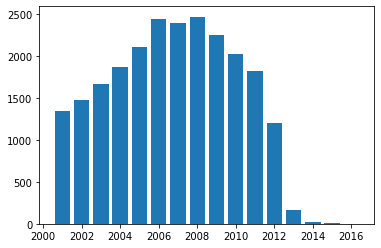

In [6]:
movie_metadata_year = movie_metadata.groupby(['year'])
sizes = movie_metadata_year.size()
plt.bar(sizes.index, sizes)
plt.show()

In [7]:
# `character.metadata.tsv` [14 M]

# Metadata for 450,669 characters aligned to the movies above, extracted from the Noverber 4, 2012 dump of Freebase.  Tab-separated; columns:

# 1. Wikipedia movie ID
# 2. Freebase movie ID
# 3. Movie release date
# 4. Character name
# 5. Actor date of birth
# 6. Actor gender
# 7. Actor height (in meters)
# 8. Actor ethnicity (Freebase ID)
# 9. Actor name
# 10. Actor age at movie release
# 11. Freebase character/actor map ID
# 12. Freebase character ID
# 13. Freebase actor ID

character_metadata = pd.read_csv(
    "./data/MovieSummaries/character.metadata.tsv",
    sep="\t",
    header=None,
    names=[
        "movie_id",
        "freebase_movie_id",
        "movie_release_date",
        "character_name",
        "actor_birthdate",
        "actor_gender",
        "actor_height",
        "actor_ethnicity",
        "actor_name",
        "actor_age",
        "freebase_character_actor_map_id",
        "freebase_character_id",
        "freebase_actor_id",
    ],
    parse_dates=["movie_release_date", "actor_birthdate"],
    date_parser=lambda x: pd.to_datetime(x, errors="coerce", utc=True),
)
character_metadata['movie_release_date']= character_metadata['movie_release_date'].dt.date
character_metadata['actor_birthdate']= character_metadata['actor_birthdate'].dt.date
character_metadata.head()

,movie_id,freebase_movie_id,movie_release_date,character_name,actor_birthdate,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age,freebase_character_actor_map_id,freebase_character_id,freebase_actor_id
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [8]:
movie_metadata[movie_metadata['movie_id'] == 5676692] # Iron Man

,movie_id,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,year
46672,5676692,/m/0dzlbx,Iron Man,2008-04-14,585174222.0,126.0,"{""/m/032f6"": ""Persian Language"", ""/m/0jzc"": ""A...","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2008.0


In [9]:
# Movie plots data.

# 42303 movies' plots in pure text

# Movie Wiki ID \t Plot summary
movie_plot = pd.read_csv('./data/MovieSummaries/plot_summaries.txt',sep='\t', \
                         names = ['movie_id', \
                               'Plot'])
plot_example = movie_plot[movie_plot['movie_id'] == 5676692]['Plot'].iloc[0] # Iron Man
movie_plot[movie_plot['movie_id'] == 5676692]

,movie_id,Plot
2999,5676692,"Playboy and genius Tony Stark, who has inherit..."


In [10]:
# merge plot data and movie metadata
movie_data = pd.merge(left = movie_metadata, right = movie_plot, left_on = 'movie_id', right_on = 'movie_id', how = 'inner')
print('Total Movie Number: ', movie_data.shape[0])
movie_data[movie_data['movie_id'] == 5676692]

Total Movie Number:  14736


,movie_id,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,year,Plot
8379,5676692,/m/0dzlbx,Iron Man,2008-04-14,585174222.0,126.0,"{""/m/032f6"": ""Persian Language"", ""/m/0jzc"": ""A...","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2008.0,"Playboy and genius Tony Stark, who has inherit..."


# 0.0.1 Load some word vectors
#### Use GloVe from https://nlp.stanford.edu/projects/glove/

In [11]:
PADDING_WORD = '<PAD>'
UNKNOWN_WORD = '<UNK>'
embedding_file_name = './data/GloVe/glove.6B.100d.txt'


def load_glove_embeddings(embedding_file, padding_idx=0, padding_word=PADDING_WORD, unknown_word=UNKNOWN_WORD):
    """
    The function to load GloVe word embeddings
    
    :param      embedding_file:  The name of the txt file containing GloVe word embeddings
    :type       embedding_file:  str
    :param      padding_idx:     The index, where to insert padding and unknown words
    :type       padding_idx:     int
    :param      padding_word:    The symbol used as a padding word
    :type       padding_word:    str
    :param      unknown_word:    The symbol used for unknown words
    :type       unknown_word:    str
    
    :returns:   (a vocabulary size, vector dimensionality, embedding matrix, mapping from words to indices)
    :rtype:     a 4-tuple
    """
    word2index, embeddings, N = {}, [], 0
    with open(embedding_file, encoding='utf8') as f:
        for line in f:
            data = line.split()
            word = data[0]
            vec = [float(x) for x in data[1:]]
            embeddings.append(vec)
            word2index[word] = N
            N += 1
    D = len(embeddings[0])
    
    if padding_idx is not None and type(padding_idx) is int:
        embeddings.insert(padding_idx, [0]*D)
        embeddings.insert(padding_idx + 1, [-1]*D)
        for word in word2index:
            if word2index[word] >= padding_idx:
                word2index[word] += 2
        word2index[padding_word] = padding_idx
        word2index[unknown_word] = padding_idx + 1
                
    return N, D, np.array(embeddings, dtype=np.float32), word2index
num_word_vec, word_vec_dim, embeddings, word2index = load_glove_embeddings(embedding_file = embedding_file_name)
print('Number of word vectors: ', num_word_vec)
print('Dimension of word vectors: ', word_vec_dim)

Number of word vectors:  400000
Dimension of word vectors:  100


# 0.1 Genre counts and group


In [12]:
# convert dict-format string to dictionary
from collections import defaultdict
genres = movie_data['movie_genres'].apply(eval)
def zero_count():
  return 0
# count the time that a certain genre occurs
genre_count = defaultdict(zero_count)
for i, genre_dict in enumerate(genres):
  for key in genre_dict.keys():
    genre_count[genre_dict[key]] += 1
print('Total Number of Genre: ', len(genre_count.keys()))

Total Number of Genre:  310


## 0.1.1 Decrease the number of genres and record new genres for each movie

In [13]:
# 0.1.1
genre_count_sorted = sorted(genre_count.items(), key = lambda x:x[1], reverse = True)
genre_count_bigger = [x for x in genre_count_sorted if x[1] >= 1000]
len(genre_count_bigger)

11

## 1. What do those blockbusters have in their plots?
We want to see whether the top-selling movies are characterized by certain topics or keywords both qualitatively and quantitatively. We can also consider certain character personas in the plots.

### 1.1 Topic modeling of plots: LDA
#### 1.1.1 Clean the text. 
  (1) Excluding stop words and punctuations. \\
  (2) Tokenizing the sentence. \\
  (3) Delete name of person using NER.

In [14]:
# 1.1
import gensim
from gensim import corpora, models
from gensim.models.ldamulticore import LdaMulticore
import nltk
nltk.download('popular', quiet=True)
from nltk.corpus import stopwords # load stopwords to exclude 
from nltk.tokenize import word_tokenize
import string
from nltk.stem.wordnet import WordNetLemmatizer # word tokenizer
import spacy
import en_core_web_sm

import pickle
import os

In [15]:
from nltk.corpus.reader.categorized_sents import word_tokenize
# load stop words for English
stop = set(stopwords.words('english'))
# load punctuations
exclude = set(string.punctuation)
# initialize work tokenizer
lemma = WordNetLemmatizer()
# initialize the NER model
NER = en_core_web_sm.load()

def clean(text):
  # exclude stop words
  ner_result = NER(text)
  name_list = []
  for x in ner_result:
    if(x.ent_iob_ != 'O'):
      name_list.append(x.text.lower())
  word_list = [word.lower() for word in word_tokenize(text)]
  no_name_no_stop = ' '.join([word for word in word_list if word not in name_list and word not in stop])
  # exclude punctuations
  punc_free = ''.join(ch for ch in no_name_no_stop if ch not in exclude)
  # turn the sentence into a list of words->word tokenize
  tokenized = ' '.join([lemma.lemmatize(word) for word in punc_free.split() if len(word) > 2])
  return tokenized.split()

# if(os.path.exists('./data/movie_data_plot_clean.pkl')):
#   with open('./data/movie_data_plot_clean.pkl', 'rb') as f:
#     movie_data_plot_clean = pickle.load(f)
#   try:
#     movie_data['plot_clean'] = movie_data_plot_clean
#   except:
#     movie_data['plot_clean']=movie_data['Plot'].apply(clean)
#     with open('./data/movie_data_plot_clean.pkl', 'wb') as f:
#       pickle.dump(movie_data['plot_clean'], f, pickle.HIGHEST_PROTOCOL)
# else:
movie_data['plot_clean']=movie_data['Plot'].apply(clean)
with open('./data/movie_data_plot_clean.pkl', 'wb') as f:
  pickle.dump(movie_data['plot_clean'], f, pickle.HIGHEST_PROTOCOL)
plot_clean_example = ' '.join(movie_data[movie_data['movie_id'] == 5676692]['plot_clean'].iloc[0])
movie_data[movie_data['movie_id'] == 5676692]

/usr/local/lib/python3.7/dist-packages/spacy/language.py:1899: UserWarning: [W123] Argument disable with value [] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  config_value=config["nlp"][key],


,movie_id,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,year,Plot,plot_clean
8379,5676692,/m/0dzlbx,Iron Man,2008-04-14,585174222.0,126.0,"{""/m/032f6"": ""Persian Language"", ""/m/0jzc"": ""A...","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2008.0,"Playboy and genius Tony Stark, who has inherit...","[genius, inherited, defense, contractor, fathe..."


### 1.2 Assign each plot to a certain set of topics. 
  (1) Get the vector representation for each topic by adding all word vectors (GloVe here maybe). \\
  (2) Build a topic vector for each plot by adding of the topic vectors, weighted by the probability of the plot belonging to this topic. 

In [16]:
# 1.2.1
#create dictionary
plot_word_dictionary = corpora.Dictionary(movie_data['plot_clean'])
# remove the word that appears less than 5 times.
plot_word_dictionary.filter_extremes(no_below=5, no_above=1.0, keep_n=None)
# fill in the gap between word indices after removing word 
plot_word_dictionary.compactify()
#Total number of non-zeroes in the BOW matrix (sum of the number of unique words per document over the entire corpus).
print('Total Unique word: ',len(plot_word_dictionary))

doc_term_matrix = [plot_word_dictionary.doc2bow(doc) for doc in movie_data['plot_clean'] ]
print('Total Documents: ',len(doc_term_matrix))

# lda = gensim.models.ldamodel.LdaModel
lda = LdaMulticore

num_topics=10
ldamodel = lda(doc_term_matrix,num_topics=num_topics,id2word=plot_word_dictionary,passes=20,minimum_probability=0)

Total Unique word:  16477
Total Documents:  14736


In [17]:
lda_corpus = ldamodel[doc_term_matrix]
topic_id_list = []
for i,doc in enumerate(lda_corpus):
  # doc: [(topic_id, prob of this doc belonging to this topic)]
  doc_topic_id = np.argmax([x[1] for x in doc])
  topic_id_list.append(doc_topic_id)
movie_data['topic_id'] = topic_id_list
movie_data[movie_data['movie_id'] == 5676692]

,movie_id,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,year,Plot,plot_clean,topic_id
8379,5676692,/m/0dzlbx,Iron Man,2008-04-14,585174222.0,126.0,"{""/m/032f6"": ""Persian Language"", ""/m/0jzc"": ""A...","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2008.0,"Playboy and genius Tony Stark, who has inherit...","[genius, inherited, defense, contractor, fathe...",1


In [18]:
movie_data_revenue = movie_data.dropna(subset = ['movie_box_office_revenue'])
movie_data_topic_group = movie_data_revenue[['movie_box_office_revenue','topic_id']].groupby(['topic_id'], as_index = False)
movie_data_topic_group_mean = movie_data_topic_group.mean()

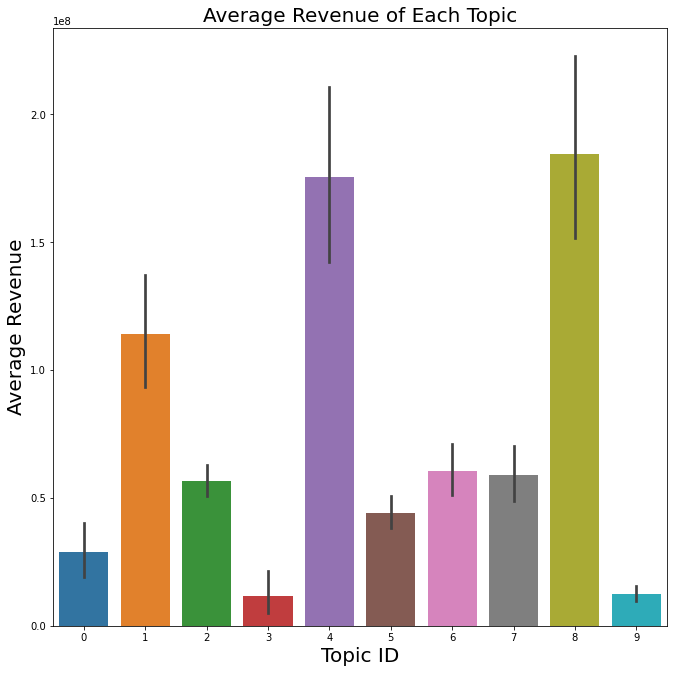

In [19]:
import seaborn as sns
plt.figure(figsize=(11,11))
sns.barplot(x = 'topic_id', y = 'movie_box_office_revenue', data = movie_data_revenue)
plt.xticks(np.arange(num_topics))
plt.xlabel('Topic ID',fontsize=20)
plt.ylabel('Average Revenue',fontsize=20)
plt.title('Average Revenue of Each Topic',fontsize=20)
plt.show()

In [20]:
revenue_list = movie_data_topic_group_mean['movie_box_office_revenue']
revenue_sorted = np.array(np.argsort(revenue_list))
topics = ldamodel.show_topics(num_topics=num_topics, formatted=False)
for idx in revenue_sorted[-3:]:
  print(topics[idx])

(1, [('agent', 0.006390628), ('police', 0.0054849274), ('officer', 0.0049105287), ('order', 0.004769868), ('case', 0.004721955), ('also', 0.0042952555), ('team', 0.0042855665), ('murder', 0.00416972), ('killed', 0.0037746406), ('death', 0.0037320754)])
(4, [('ship', 0.0070871827), ('battle', 0.006569742), ('kill', 0.0065081953), ('return', 0.006504555), ('fight', 0.0061917035), ('back', 0.005520218), ('take', 0.0054965853), ('attack', 0.005012285), ('find', 0.004963495), ('vampire', 0.0048637544)])
(8, [('find', 0.010287708), ('power', 0.008108911), ('world', 0.007993823), ('human', 0.0076208636), ('back', 0.0075230477), ('time', 0.005922291), ('alien', 0.0054932986), ('new', 0.004651807), ('take', 0.0046047913), ('help', 0.004211453)])


### 1.3 Keywords extraction of each plot, by KeyBERT

In [21]:
# 1.3
!pip install -q keybert
from keybert import KeyBERT
kw_model = KeyBERT('all-MiniLM-L6-v2')
def extract_keywords(word_list):
  text = ' '.join(word_list)
  keywords = kw_model.extract_keywords(text, keyphrase_ngram_range=(1, 3), stop_words=None, use_mmr=True, diversity=0.5, top_n = 20)
  return keywords
def keyword2vec_weighted(keywords):
  keyword_prob_max = keywords[0][1]
  word_vec = np.zeros((word_vec_dim))
  word_num = 1
  for keyword_prob in keywords:
    word_list = keyword_prob[0].split()
    word_prob = float(keyword_prob[1]) 
    if(word_prob < 0.1):
      continue
    word_prob = word_prob / keyword_prob_max
    for word in word_list:
      try:
        word_vec = word_vec + word_prob * embeddings[word2index[word]]
        word_num += 1
      except:
        # print(word)
        pass
    return word_vec / word_num
def keyword2vec_unweight(keywords):
  keyword_prob_max = keywords[0][1]
  word_vec = np.zeros((word_vec_dim))
  word_num = 1
  for keyword_prob in keywords:
    word_list = keyword_prob[0].split()
    word_prob = float(keyword_prob[1]) 
    if(word_prob < 0.1):
      continue
    for word in word_list:
      try:
        word_vec = word_vec + embeddings[word2index[word]]
        word_num += 1
      except:
        # print(word)
        pass
    return word_vec / word_num
movie_data_sampled = movie_data.sample(1000)
movie_data_sampled['plot_keyword_list'] = movie_data_sampled['plot_clean'].apply(extract_keywords)
movie_data_sampled['plot_keyword_vec_weighted'] = movie_data_sampled['plot_keyword_list'].apply(keyword2vec_weighted)
movie_data_sampled['plot_keyword_vec_unweighted'] = movie_data_sampled['plot_keyword_list'].apply(keyword2vec_unweight)
# with open('./data/keywords.pkl', 'wb') as f:
#   pickle.dump(movie_data['plot_keyword_list','plot_keyword_vec_weighted','plot_keyword_vec_unweighted'], f, pickle.HIGHEST_PROTOCOL)

     |████████████████████████████████| 85 kB 2.9 MB/s 
     |████████████████████████████████| 237 kB 32.2 MB/s 
     |████████████████████████████████| 51 kB 6.7 MB/s 
     |████████████████████████████████| 5.5 MB 33.1 MB/s 
     |████████████████████████████████| 1.3 MB 47.4 MB/s 
     |████████████████████████████████| 163 kB 47.0 MB/s 
     |████████████████████████████████| 7.6 MB 33.9 MB/s 


Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [22]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

keyword_vectors = np.stack(movie_data_sampled['plot_keyword_vec_weighted'].values)
cluster_dist = []
for n_cluster in range(2, 70):
  kmeans = KMeans(n_clusters=n_cluster, random_state=0)
  kmeans.fit(keyword_vectors)
  # get the sum of squared distances of samples to their closest cluster center
  # to see the cluster quality, pick the smallest one
  # print(kmeans.inertia_)
  cluster_dist.append(kmeans.inertia_)
print(np.argmin(cluster_dist) + 2)

69


In [23]:
kmeans = KMeans(n_clusters=20, random_state=0)
kmeans_res = kmeans.fit(keyword_vectors)
label_cnt = np.bincount(kmeans_res.labels_)
top_10_cluster = np.argsort(label_cnt)[-10:]

In [24]:
tsne = TSNE(perplexity=20, random_state=42)
keyword_vectors_2dim = tsne.fit_transform(keyword_vectors)

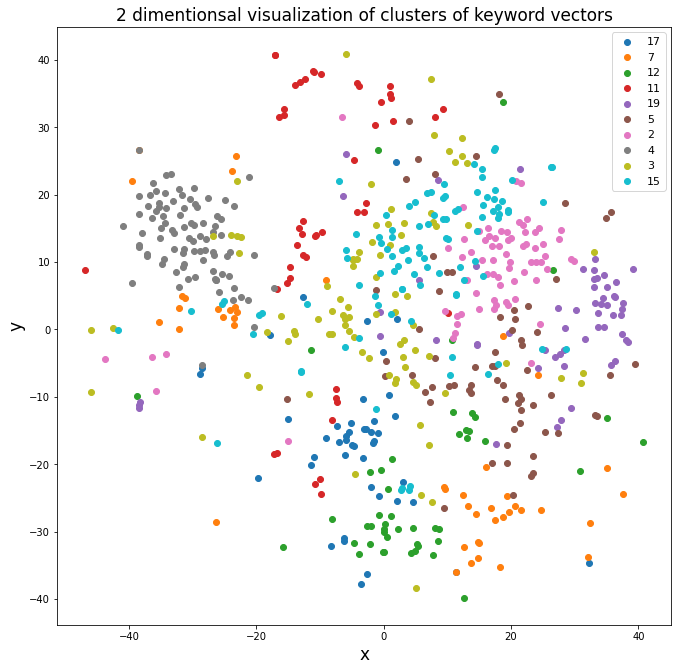

In [25]:
plt.figure(figsize=(11,11))
for label_idx in top_10_cluster:
  plt.scatter(keyword_vectors_2dim[np.where(kmeans_res.labels_==label_idx),0],keyword_vectors_2dim[np.where(kmeans_res.labels_==label_idx),1], label = f"{label_idx}")
plt.legend(fontsize=11)
plt.xlabel('x', fontsize=17)
plt.ylabel('y', fontsize=17)
plt.title('2 dimentionsal visualization of clusters of keyword vectors', fontsize=17)
plt.show()

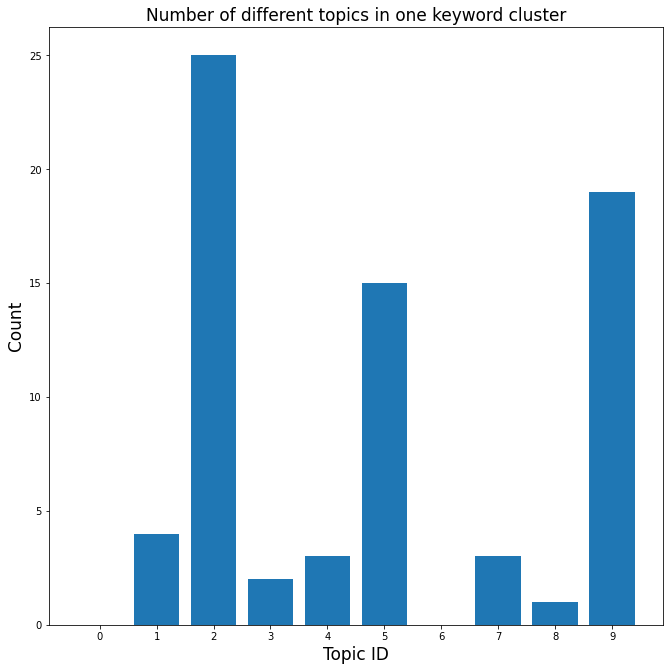

In [26]:
movie_data_sampled['keyword_cluster_id'] = kmeans_res.labels_
movie_data_sampled_group_keyword = movie_data_sampled.groupby('keyword_cluster_id')
for i, group in movie_data_sampled_group_keyword:
  topics = group['topic_id']
  topic_count = np.bincount(topics)
  if(i == 2):
    break
plt.figure(figsize=(11,11))
plt.bar(np.arange(len(topic_count)),topic_count)
plt.xticks(np.arange(num_topics),np.arange(num_topics))
plt.xlabel('Topic ID', fontsize=17)
plt.ylabel('Count', fontsize=17)
plt.title('Number of different topics in one keyword cluster', fontsize=17)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


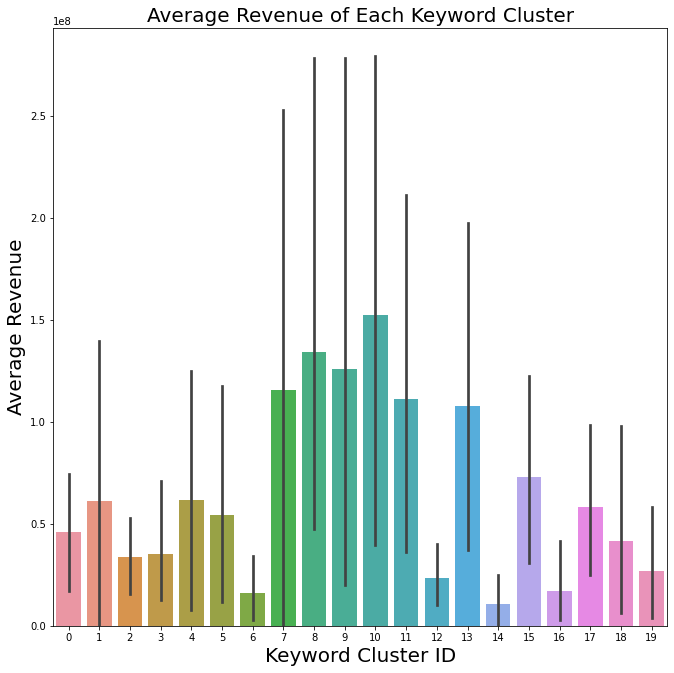

In [33]:
movie_data_sampled_group_keyword_mean = movie_data_sampled_group_keyword.mean()
plt.figure(figsize=(11,11))
sns.barplot(x = 'keyword_cluster_id', y = 'movie_box_office_revenue', data = movie_data_sampled, errorbar = 'ci')
plt.xticks(np.arange(20))
plt.xlabel('Keyword Cluster ID',fontsize=20)
plt.ylabel('Average Revenue',fontsize=20)
plt.title('Average Revenue of Each Keyword Cluster',fontsize=20)
plt.show()

In [26]:
from sklearn.metrics.pairwise import cosine_similarity
all_sim = cosine_similarity(word_vec.reshape(1, -1), embeddings)
all_sim.shape


NameError: ignored

In [ ]:
sorted_sim = np.argsort(all_sim[0])
all_sim[0][sorted_sim[-5:]]

In [ ]:
for word in word2index:
  if(word2index[word] in sorted_sim[-30:]):
    print(word)

### 1.4 Build keyword vector for each plot by summing up all word vectors in keyword list of each plot.

In [ ]:
# 1.4

### 1.5 Clustering of topics and keywords.
This part is the backbone of this first part analysis. 
#### 1.5.1 K-means of all plots' topic & keyword vectors.
#### 1.5.2 Observe clusters and visualize the revenue of each movie by color (discrete revenue level or continuous revenue color mapping)
#### 1.5.3 See whether certain clusters contain all top-selling or all bad-selling movies. 
#### 1.5.4 Here ends the qualitative analysis. For quantitative analysis, compare the averaged revenues in each cluster along with uncertainty (CI maybe) to see if the effect of different clusters of topics and keywords are significant.

In [ ]:
# 1.5.1

In [ ]:
# 1.5.2 & 1.5.3

### 1.6 Split movies into different genres (groupby)
#### 1.6.1 Decide main genres by frequency
#### 1.6.2 For movies belonging to each genres, do 1.5 again to see genre-related visualization.

In [ ]:
# 1.6.1

In [ ]:
# 1.6.2

### 1.7 Time-related topic & keywords changing
#### 1.7.1 Discretize time into decades.
#### 1.7.2 In each decade, do 1.5 to see time-related changing of topics and keywords.

In [ ]:
# 1.7.1

In [ ]:
# 1.7.2

# End of first part. 
#### Problems:
1. Do we need to combine genres and time? May result in too many groups of data and lack of amount of data in each group.

# 2. Can this actor contribute to more revenues?

## 2.1 Actor fitness score definition and calculation
Definition: The difference between the movie’s revenue and the average of movies including that actor. \\
Calculation: For each actor, there is a fitness score for each movie that the actor is in. 
Can only do this to protagonist or main characters (how to extract this)


## 2.2 For each actor, build a regression model
(1) Input features: \\
  1) Movie: plot keyword vectors, topic vectors (not needed to add together, can split as features), movie genres (main genres only), movie all properties (time, area, etc) Time can be split over to a independent variable. \\
  2) Actor: all related, age, sex, etc. \\
(2) Output: the fitness score for this actor in this movie.

## 2.3 Analysis of the coeff in the model for each actor.
(1) Are there any actors that the regression is not significant or coefficient all close to 0? This means the actor is very general.(all movies have similar revenues)

## 2.4 Build the model but exclude sex as input feature. 
#### 2.4.1 Build the model for actor and actress. Are the coefficients for man significantly higher than women?
Potential binding effect for man and woman actors. E.g., woman has higher coeff in love movie while man higher in action, or different character personas

## 2.5 Genre split. Maybe

## 2.6 Time-related analysis. Maybe
Detect outdated actor?

## 2.7 Actor recommendation
By analyzing the coefficient. Different time, different genre. 

## Play with DATA

[CMU Movie Summary Corpus](http://www.cs.cmu.edu/~ark/personas/)

`plot_summaries.txt` [29 M]

Plot summaries of 42,306 movies extracted from the November 2, 2012 dump of English-language Wikipedia.  Each line contains the Wikipedia movie ID (which indexes into movie.metadata.tsv) followed by the summary.


`corenlp_plot_summaries.tar` [628 M, separate download]

The plot summaries from above, run through the Stanford CoreNLP pipeline (tagging, parsing, NER and coref). Each filename begins with the Wikipedia movie ID (which indexes into movie.metadata.tsv).


### TEST DATA
`tvtropes.clusters.txt`

72 character types drawn from tvtropes.com, along with 501 instances of those types.  The ID field indexes into the Freebase character/actor map ID in character.metadata.tsv.

`name.clusters.txt`


970 unique character names used in at least two different movies, along with 2,666 instances of those types.  The ID field indexes into the Freebase character/actor map ID in character.metadata.tsv


In [ ]:
# If you already downloaded CoreNLP data, you can avoid downloading by
# put it to data/corenlp_plot_summaries.tar
%cd /content/drive/MyDrive/EPFL_course_project/ada-2022-project-superplainteamname2022/
!sh ./data/setup.sh

In [ ]:
character_metadata.query('actor_age <= 0')[['movie_release_date', 'actor_birthdate','actor_age']]

In [ ]:
# play with the data - check the calculation of actor age

calculated_age = (character_metadata.movie_release_date - character_metadata.actor_birthdate).astype('timedelta64[Y]')
ages = character_metadata[['freebase_actor_id', 'actor_age', 'actor_birthdate', 'movie_release_date']]
ages['calculated_age'] = calculated_age
ages['diff'] = ages['actor_age'] - ages['calculated_age']

print("diff>1 :{}".format(ages[ages['diff'].apply(lambda x: not np.isnan(x) and np.abs(x) > 1)]))
ages[ages['diff'].apply(lambda x: not np.isnan(x) and x != 0)]

Some ages has error 1. Some ages are negative...

In [ ]:
# CoreNLP: https://stanfordnlp.github.io/CoreNLP/

def load_coreNLP_data(wiki_movie_id: int):
    """
    data/corenlp_plot_summaries/{wiki_movie_id}.xml.gz
    """
    from bs4 import BeautifulSoup
    import gzip
    
    xml = f'data/corenlp_plot_summaries/{wiki_movie_id}.xml.gz'
    with gzip.open(xml, 'rb') as f:
        soup = BeautifulSoup(f, 'xml')
    return soup

In [ ]:
data = load_coreNLP_data(3217)
# data is like:
# <document>
#   <sentences>
#       <sentence>
#           ...
#       </sentence>
#   </sentences>
#   <coreference>
#      <coreference>
#         ...
#      </coreference>
#  </coreference>
# </document>
print(set(tag.name for tag in data.document.find_all(recursive=False)))
print(set(tag.name for tag in data.sentences.find_all(recursive=False)))
print(set(tag.name for tag in data.sentences.sentence.find_all(recursive=False)))
# print(data.sentence)

print(set(tag.name for tag in data.coreference.find_all(recursive=False)))
print(set(tag.name for tag in data.coreference.coreference.find_all(recursive=False)))
print(data.coreference.coreference.prettify())

